# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [21]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

(100, 1) (100,)
Shapes are not similar. x's have shape (n_samples, 1) and y's of (num_samples, ), so we need to take this in computing the gradient. Apparently this is because the waythe function make_regression works. We have to take care in exercise 3 because of this


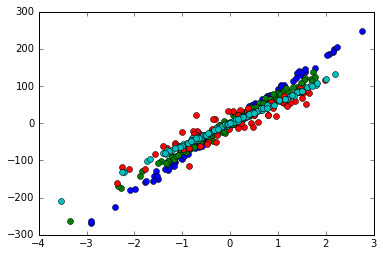

In [22]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

############### More DATASETS

noise = 7 #Standard deviation of added Gaussian noise
n_samples = 150 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x2,y2) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x2,y2,'o')

noise = 20 #Standard deviation of added Gaussian noise
n_samples = 75 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x3,y3) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x3,y3,'o')

noise = 2 #Standard deviation of added Gaussian noise
n_samples = 125 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x4,y4) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x4,y4,'o')

print x1.shape, y1.shape
print "Shapes are not similar. x's have shape (n_samples, 1) and y's of (num_samples, ), " \
      "so we need to take this in computing the gradient. Apparently this is because the way" \
      "the function make_regression works. We have to take care in exercise 3 because of this"

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

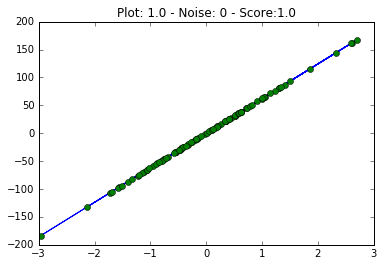

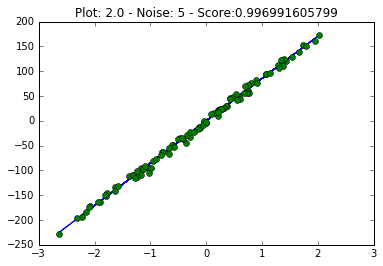

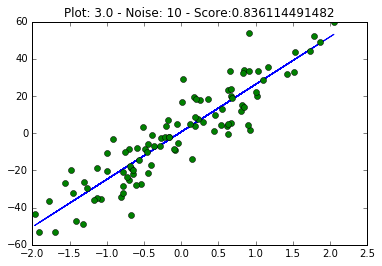

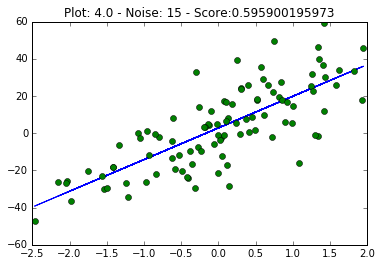

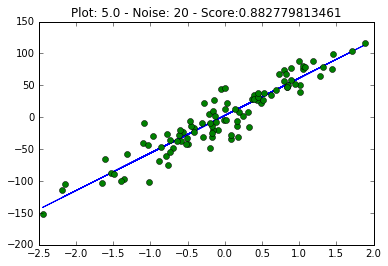

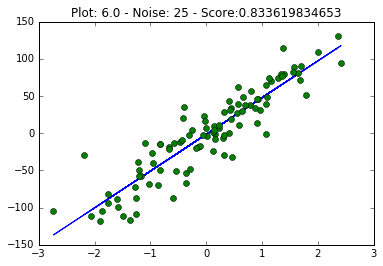

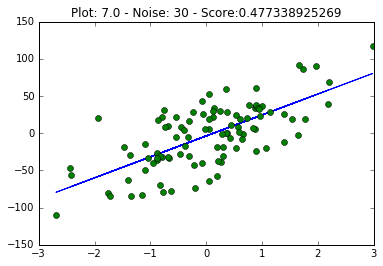

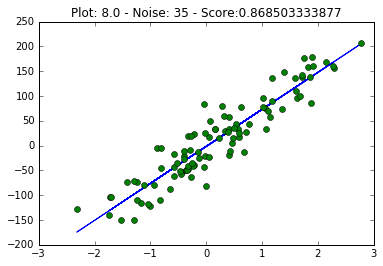

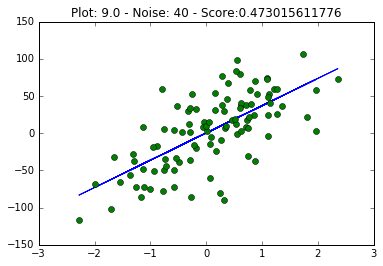

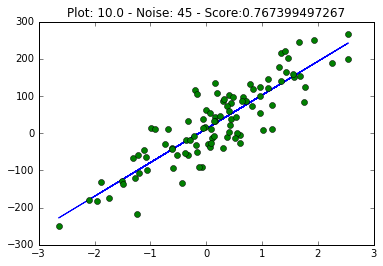

In [23]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

for x in xrange(0,50,5):
    counter = x / 5 + 1;
    noise = x #Standard deviation of added Gaussian noise
    n_samples = 100 #Size of the dataset
    n_dimensions = 1 #We are doing univariate regression, so leave this at 1
    (x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
    #Fit the regression object on the data
    regr.fit(x1,y1)
    #Print the score that the fit has
    #Plot the resulting line
    plt.title('Plot: ' + str(counter) + ' - Noise: ' + str(x) + ' - Score:' + str(regr.score(x1,y1)))
    plt.plot(x1,regr.predict(x1))
    plt.plot(x1,y1,'o')
    plt.show()

## Your analysis

varying the noise will affect the score in the following way: the higher the level of noise the lower the score will be. The closer to one the score is the better the data fits the regression line. It makes sense that increasing noise (i.e., unexplained variation) would decrease the score. In this way, it makes perfect sense that 0 noise means a perfect fit. 

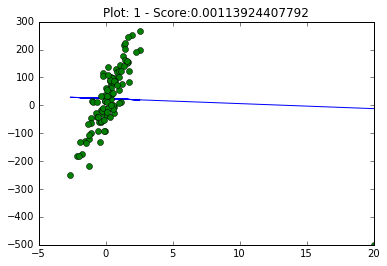

This is, of course, not a good prediction or fit. The score is, as expected, very low


In [24]:
#Add a serious outlier and see what happens
x5 = x1
y5 = y1

x5[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y5[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
regr.fit(x5,y5)

plt.title('Plot: 1 - Score:' + str(regr.score(x5,y5)))
plt.plot(x5,regr.predict(x5))
plt.plot(x5,y5, "o")
plt.show()

print "This is, of course, not a good prediction or fit. The score is, as expected, very low"


## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [25]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    # return the hypothesis function's result
    return (1 * theta0) + (x * theta1)

In [26]:
#Use the output of that function to compute the cost function J:
import numpy as np
from __future__ import division

def cost_function(x_predict,y):
    # just return the cost function
    return float(1/(2*len(x_predict))) * sum((x_predict-y)**2) #returns the cost

# We can check this manually: correct
# cost_function(np.array([1,2]),np.array([3,3]))


Theta0 after iteration 1 = 0.51197812663
Theta1 after iteration 1 = 3.83239898102
--------------------------------------------------
Theta0 after iteration 2 = 0.520969404141
Theta1 after iteration 2 = 6.55430639719
--------------------------------------------------
Theta0 after iteration 3 = 0.52721632837
Theta1 after iteration 3 = 9.17003463621
--------------------------------------------------
Theta0 after iteration 4 = 0.530945634665
Theta1 after iteration 4 = 11.683727671
--------------------------------------------------
Theta0 after iteration 5 = 0.532369227902
Theta1 after iteration 5 = 14.099367642
--------------------------------------------------
Theta0 after iteration 6 = 0.531685060444
Theta1 after iteration 6 = 16.4207811826
--------------------------------------------------
Theta0 after iteration 7 = 0.529077960873
Theta1 after iteration 7 = 18.6516454963
--------------------------------------------------
Theta0 after iteration 8 = 0.524720416159
Theta1 after iteration 8

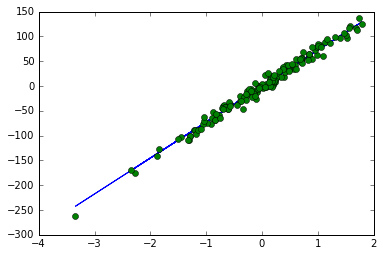

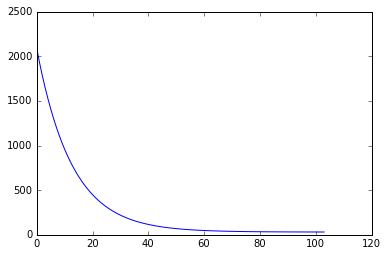

Final result : 
theta0 = -0.418300221333 and theta1 = 72.471944274
The cost function also goes down drastically. That's what we wanted to see! 


In [27]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
#These are some default parameters, see how playing with them affects the behavior

'''
stop conditions are based on difference between 2 iterations
so we just make this very large, it will stop eventually.
'''
iterations = 1000
# stopcondition = 1000
cost = [] # an empty list where cost at each iteration will be appended into

def compute_gradient(x_predict,y, x):
    # init counter
    i = 0 
    # here we compensate for the shape differences.
    # apparently x1 is in the right shape
    if x is not x1:
        x = x[:,0]
    # initialize values
    # sync these with function calls
    alpha = 0.05
    theta0 = 0.5
    theta1 = 1
    while (i < iterations):
        # increment counter
        i = i + 1
        # predict x values from the prediction function
        x_predict = prediction_function(x, theta0, theta1)
        # update theta0 according to the rules
        theta0 = theta0 - alpha * (float(1)/float(len(x_predict))) * sum(x_predict-y) 
        # update theta1 according to the rules
        theta1 = theta1 - alpha * (float(1)/float(len(x_predict)) * sum((x_predict-y)*x))
        print "Theta0 after iteration %s = %s" %(i, theta0)
        print "Theta1 after iteration %s = %s" %(i, theta1)
        print "--------------------------------------------------"
        cost.append(cost_function(x_predict, y)) # append cost per iteration
        index = i-1 # for stop condition
        # stop condition based on difference between 2 iterations
        if index > 0 and cost[index-1] - cost[index] < 0.05:  
            break
            
    plt.plot(x,x_predict) # plot final function
    plt.plot(x,y,'o') # plot the data points
    plt.show()
    
    plt.plot(cost)
    plt.show()
    ## FOR PRECISE VALUES UNCOMMENT THIS PART ##
    # print 'All the cost function calculations', cost
    return theta0, theta1


# we estimate with theta0 = 0 and theta1 = 1
print "Final result : \ntheta0 = %s and theta1 = %s" % compute_gradient(prediction_function(x2, 0.5, 1), y2, x2)

print "The cost function also goes down drastically. That's what we wanted to see! "

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

For the data sets that were tested by the compute_gradient function, the number of iterations is around 60 until they find 'good' (meaning, the difference between two cost function calculations is small) values for theta0 and theta1. If these two variables do not change very fast in between two iterations, the fit is pretty good. I set the learning rate as 0.1 in my example, but suppose we change that to 0.5 we immediately notice the things we would have wanted to notice. Namely, the number of iterations goes down (to approximately 15 for most datasets). In addition, increasing the alpha value results into the minimal cost value of J being attained faster. I did not use a stop condition in the sense of iterations attained (unless it would indeed take that long), but I implemented a difference calculation that simply checks for well enough subsequent results. The threshold of 0.05 is, with the data sets at hand, pretty accurate. Finally, we can also check our assumptions about the learning rate alpha. If we set this value too low (i.e. 0.001) then a good fit will, even after 1000 iterations, not occur. And if we set this value too high (i.e. 2) then we also get a diversion of the fit. We never attain any good minimum value of J.

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

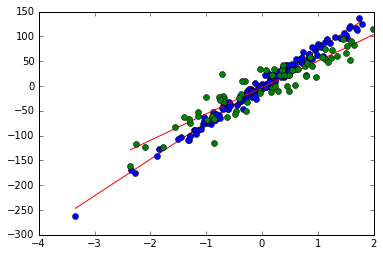

In [28]:
'''
create numpy matrix
let us not use x because it was defined earlier.
LINEAR ALGEBRA: A x = b
we know the size of the matrix because we know the data size
'''

# change these parameters for different data sets
def least_squares_theta(x, y):
    A = np.zeros(shape = (len(x), 2))
    # let us use x1
    for i in range(len(x)):
        A[i][0] = 1
        A[i][1] = x[i]

    A = matrix(A)
    # define b
    b = np.matrix(y).T 

    # use the closed form formula
    thetas = (A.T * A).I * A.T * b
    ''' 
    assign x coordinates of the regression line 
    IE: x1 has minimum -2.25 and max 2.09, so make n*2 steps in this interval
    we know the data range for x1 in 200 steps, -2 until 2.5
    see first block
    '''  
    # first element of this matrix is then theta0, second theta1
    xx = np.linspace(x.min(), x.max(), 2* len(x)) 
    # calculate values of y with the thetas
    yy = np.array(thetas[0] + thetas[1] * xx)
    
        # plot
    plt.plot(xx, yy.T, color='r')
    plt.plot(x, b, 'o')
    plt.show


# oh lala they look perfect.
least_squares_theta(x2, y2)
least_squares_theta(x3, y3)

